**Import required libraries**

In [1]:
import zipfile
import os 
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.layers import Conv2D
import json

**Unzip File**

In [2]:
# unzip the dataset
local_zip = './Dataset.zip' # lokasi 
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

**Define Directories**

In [3]:
# train 
train_bayleaves = os.path.join('./ClassificationData/Train/BayLeaves')
train_blackpepper = os.path.join('./ClassificationData/Train/BlackPepper')
train_candlenut = os.path.join('./ClassificationData/Train/Candlenut')
train_cardamom = os.path.join('./ClassificationData/Train/Cardamom')
train_cinnamon = os.path.join('./ClassificationData/Train/Cinnamon')
train_coriander = os.path.join('./ClassificationData/Train/Coriander')
train_garlic = os.path.join('./ClassificationData/Train/Garlic')
train_gojiberry = os.path.join('./ClassificationData/Train/GojiBerry')
train_staranise = os.path.join('./ClassificationData/Train/StarAnise')
train_turmeric = os.path.join('./ClassificationData/Train/Turmeric')

# validation 
val_bayleaves = os.path.join('./ClassificationData/Validation/BayLeaves')
val_blackpepper = os.path.join('./ClassificationData/Validation/BlackPepper')
val_candlenut = os.path.join('./ClassificationData/Validation/Candlenut')
val_cardamom = os.path.join('./ClassificationData/Validation/Cardamom')
val_cinnamon = os.path.join('./ClassificationData/Validation/Cinnamon')
val_coriander = os.path.join('./ClassificationData/Validation/Coriander')
val_garlic = os.path.join('./ClassificationData/Validation/Garlic')
val_gojiberry = os.path.join('./ClassificationData/Validation/GojiBerry')
val_staranise = os.path.join('./ClassificationData/Validation/StarAnise')
val_turmeric = os.path.join('./ClassificationData/Validation/Turmeric')

In [4]:
print('BAY LEAVES TRAIN SET: ', len(os.listdir(train_bayleaves)))
print('BLACK PEPPER TRAIN SET: ', len(os.listdir(train_blackpepper)))
print('CANDLENUT TRAIN SET: ', len(os.listdir(train_candlenut)))
print('CARDAMOM TRAIN SET: ', len(os.listdir(train_cardamom)))
print('CINNAMON TRAIN SET: ', len(os.listdir(train_cinnamon)))
print('CORIANDER TRAIN SET: ', len(os.listdir(train_coriander)))
print('GARLIC TRAIN SET: ', len(os.listdir(train_garlic)))
print('GOJI BERRY TRAIN SET: ', len(os.listdir(train_gojiberry)))
print('STAR ANISE TRAIN SET: ', len(os.listdir(train_staranise)))
print('TURMERIC TRAIN SET: ', len(os.listdir(train_turmeric)))

BAY LEAVES TRAIN SET:  105
BLACK PEPPER TRAIN SET:  105
CANDLENUT TRAIN SET:  105
CARDAMOM TRAIN SET:  105
CINNAMON TRAIN SET:  105
CORIANDER TRAIN SET:  105
GARLIC TRAIN SET:  105
GOJI BERRY TRAIN SET:  105
STAR ANISE TRAIN SET:  105
TURMERIC TRAIN SET:  105


In [5]:
print('BAY LEAVES VALIDATION SET: ', len(os.listdir(val_bayleaves)))
print('BLACK PEPPER VALIDATION SET: ', len(os.listdir(val_blackpepper)))
print('CANDLENUT VALIDATION SET: ', len(os.listdir(val_candlenut)))
print('CARDAMOM VALIDATION SET: ', len(os.listdir(val_cardamom)))
print('CINNAMON VALIDATION SET: ', len(os.listdir(val_cinnamon)))
print('CORIANDER VALIDATION SET: ', len(os.listdir(val_coriander)))
print('GARLIC VALIDATION SET: ', len(os.listdir(val_garlic)))
print('GOJI BERRY VALIDATION SET: ', len(os.listdir(val_gojiberry)))
print('STAR ANISE VALIDATION SET: ', len(os.listdir(val_staranise)))
print('TURMERIC VALIDATION SET: ', len(os.listdir(val_turmeric)))

BAY LEAVES VALIDATION SET:  45
BLACK PEPPER VALIDATION SET:  45
CANDLENUT VALIDATION SET:  45
CARDAMOM VALIDATION SET:  45
CINNAMON VALIDATION SET:  45
CORIANDER VALIDATION SET:  45
GARLIC VALIDATION SET:  45
GOJI BERRY VALIDATION SET:  45
STAR ANISE VALIDATION SET:  45
TURMERIC VALIDATION SET:  45


**Data Augmentation**

In [6]:
dir_training = "./ClassificationData/Train"

training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
      featurewise_center=False,  
      samplewise_center=False,  
      featurewise_std_normalization=False,  
      samplewise_std_normalization=False,  
      zca_whitening=False,
	    rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.3,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	dir_training,
	target_size=(224,224),
	class_mode='categorical'
)

Found 1050 images belonging to 10 classes.


In [7]:
dir_validation = "./ClassificationData/Validation"

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

validation_generator = validation_datagen.flow_from_directory(
	dir_validation,
	target_size=(224,224),
	class_mode='categorical',
)

Found 450 images belonging to 10 classes.


In [8]:
base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation=tf.keras.activations.softmax)(x)

model_spice = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model_spice.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [9]:
lr_scheduler = ReduceLROnPlateau(factor=0.5, 
                                 patience=3, 
                                 verbose=1)

model_checkpoint = ModelCheckpoint(save_best_only=True, 
                                   save_weights_only=True, 
                                   monitor='val_accuracy', 
                                   mode='max')

TypeError: ModelCheckpoint.__init__() missing 1 required positional argument: 'filepath'

In [ ]:
# Compile the model
model_spice.compile(optimizer=Adam(), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

# Proceed with training
history = model_spice.fit(train_generator, 
                          epochs=20, 
                          validation_data=validation_generator, 
                          verbose=1,
                          callbacks=[lr_scheduler, model_checkpoint])

Epoch 1/30
14/33 [===========>..................] - ETA: 31s - loss: 2.1706 - accuracy: 0.2210

c:\Python310\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/33 [==================>...........] - ETA: 20s - loss: 2.0082 - accuracy: 0.3006

c:\Python310\lib\site-packages\PIL\TiffImagePlugin.py:850: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


33/33 [==============================] - 80s 2s/step - loss: 1.7705 - accuracy: 0.3857 - val_loss: 0.7486 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2/30
33/33 [==============================] - 73s 2s/step - loss: 0.8171 - accuracy: 0.7124 - val_loss: 0.3905 - val_accuracy: 0.8733 - lr: 0.0010
Epoch 3/30
33/33 [==============================] - 74s 2s/step - loss: 0.4795 - accuracy: 0.8419 - val_loss: 0.3128 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 4/30
33/33 [==============================] - 76s 2s/step - loss: 0.4460 - accuracy: 0.8610 - val_loss: 0.2654 - val_accuracy: 0.9067 - lr: 0.0010
Epoch 5/30
33/33 [==============================] - 75s 2s/step - loss: 0.3512 - accuracy: 0.8914 - val_loss: 0.2880 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 6/30
33/33 [==============================] - 72s 2s/step - loss: 0.2948 - accuracy: 0.8981 - val_loss: 0.2589 - val_accuracy: 0.9156 - lr: 0.0010
Epoch 7/30
33/33 [==============================] - 74s 2s/step - loss: 0.2209 - accuracy: 0.

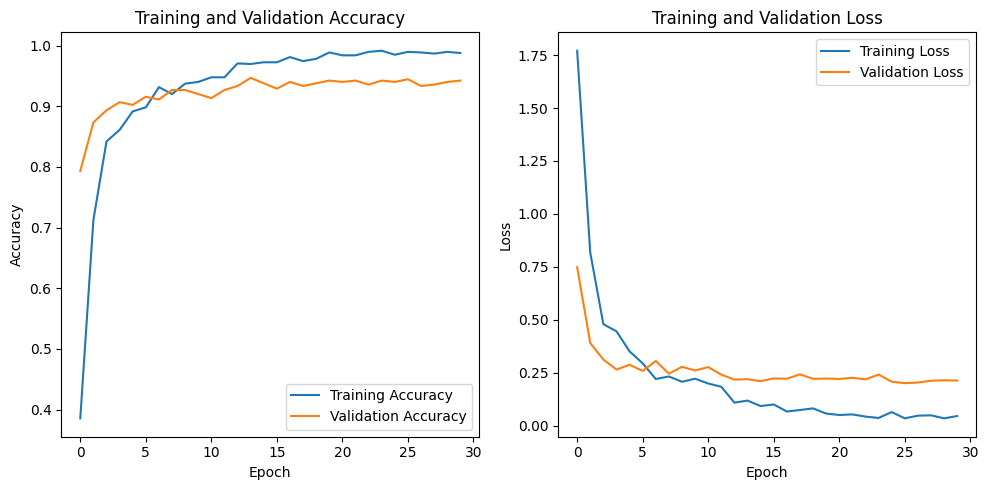

In [ ]:
# Get the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
model_spice.save('Masaala_Model_Final.h5')
#download tensorflow js, tensorflowjs_converter -> 2 files bin, model json
tf.keras.models.save_model(model_spice,'Masaala.hdf5')

In [ ]:
from keras.models import load_model
from keras.models import model_from_json

# Load the saved Keras model
model_spice = load_model('Masaala_Model_Final.h5')

# Convert the model to JSON format
json_model = model_spice.to_json()

# Save the JSON model to a file
with open('masasala_saved.json', 'w') as json_file:
    json_file.write(json_model)